In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from VAE import *
%matplotlib inline
from matplotlib import pyplot as plt

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
batch_size = 100
learning_rate = 1e-3
epoch = 100
label_size = 32

encoder
Tensor("vae/add_2:0", shape=(100, 32), dtype=float32)
loss in  0 epoch  1  batch :  -515.40375
loss in  1 epoch  1  batch :  -3331191.0
loss in  2 epoch  1  batch :  -12332496.0
loss in  3 epoch  1  batch :  -24972234.0
loss in  4 epoch  1  batch :  -40907770.0
loss in  5 epoch  1  batch :  -60480176.0
loss in  6 epoch  1  batch :  -86693600.0
loss in  7 epoch  1  batch :  -112518530.0
loss in  8 epoch  1  batch :  -144836220.0
loss in  9 epoch  1  batch :  -177803970.0
loss in  10 epoch  1  batch :  -215303780.0
loss in  11 epoch  1  batch :  -248304690.0
loss in  12 epoch  1  batch :  -278174140.0
loss in  13 epoch  1  batch :  -332892930.0
loss in  14 epoch  1  batch :  -379687650.0
loss in  15 epoch  1  batch :  -427918240.0
loss in  16 epoch  1  batch :  -487685440.0
loss in  17 epoch  1  batch :  -538399600.0
loss in  18 epoch  1  batch :  -559544400.0
loss in  19 epoch  1  batch :  -646401100.0
loss in  20 epoch  1  batch :  -713185200.0
loss in  21 epoch  1  batch :  -7

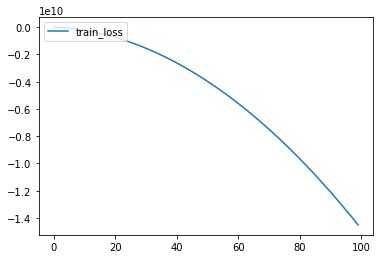

In [4]:
with tf.Session() as sess:
    
    vae = VAE(
        input_shape=list(mnist.train.images.shape[1:]),
        label_size=label_size,
        batch_size=100,
        learning_rate=learning_rate
    )
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    
    loss_history = []
    
    for i in range(epoch):
      loss_mean = 0
      for j in range(1000):
        images,_ = mnist.train.next_batch(100)
        loss = vae.train(images,sess)
        loss_mean+= loss
        if j % 1000 == 1:
            print('loss in ',i,'epoch ',j,' batch : ',loss)
      loss_mean /= 1000
      loss_history.append(loss_mean)
    
    
    plt.plot(loss_history)
    plt.legend(['train_loss'],loc='upper left')
    
    Z = np.random.normal(size=(batch_size,label_size))
    predict = vae.predict(Z,sess)



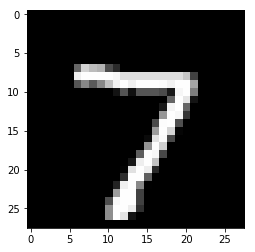

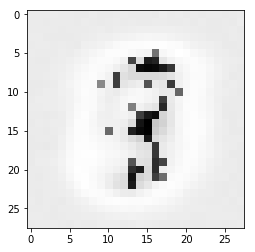

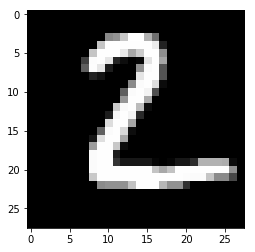

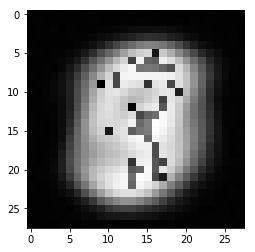

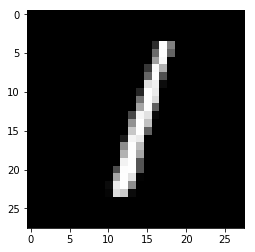

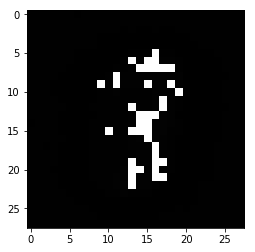

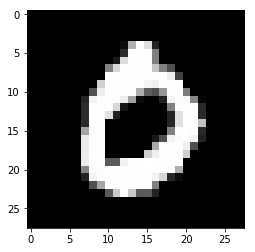

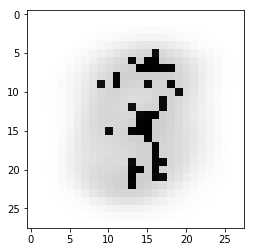

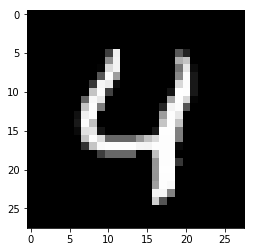

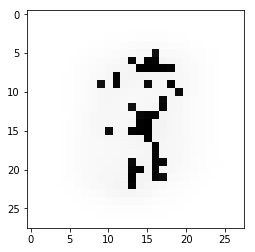

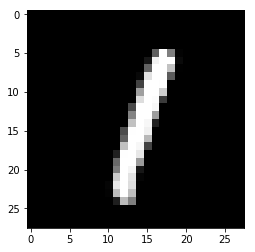

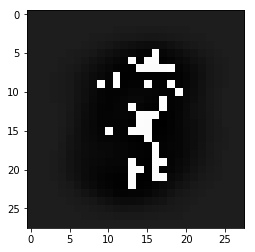

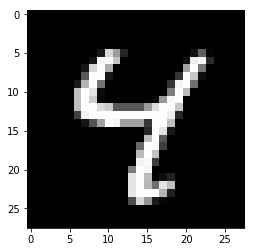

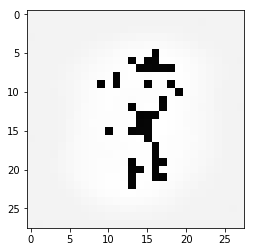

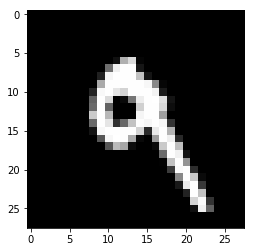

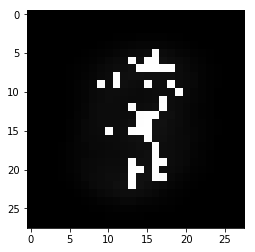

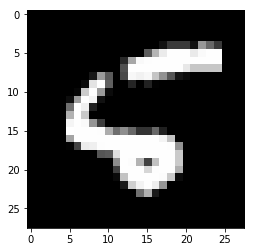

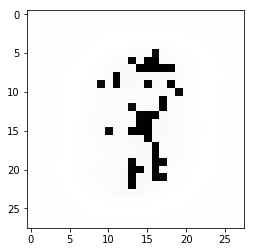

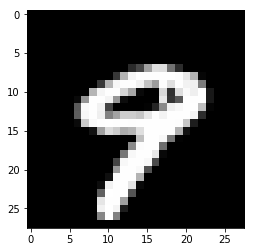

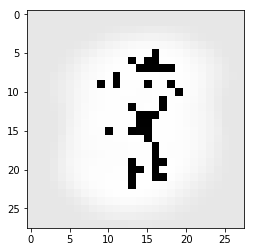

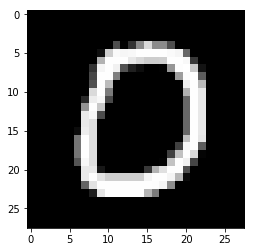

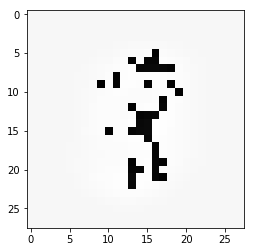

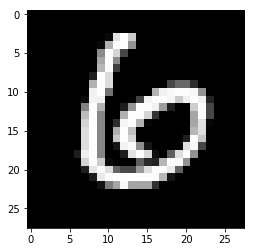

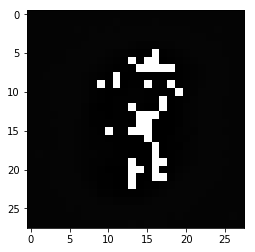

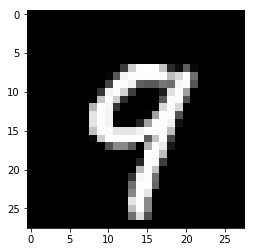

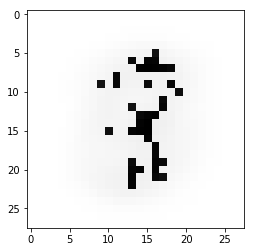

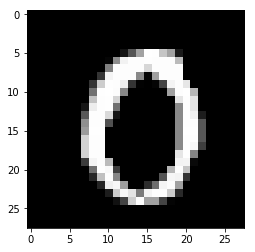

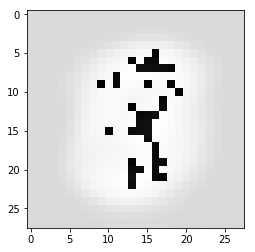

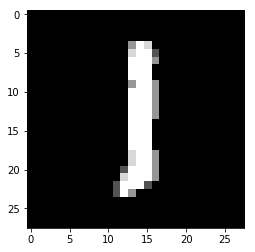

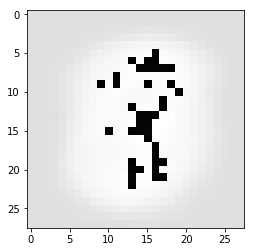

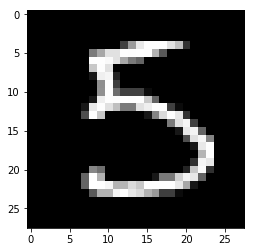

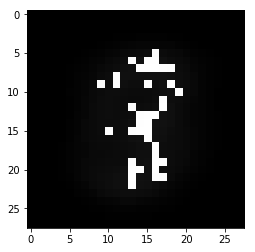

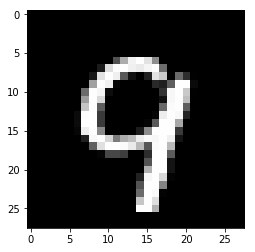

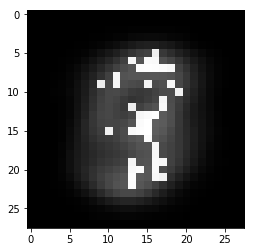

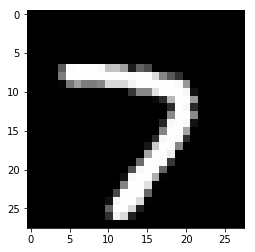

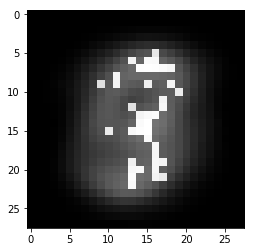

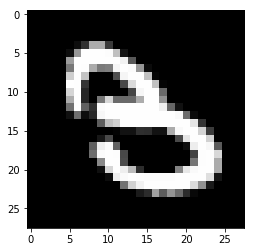

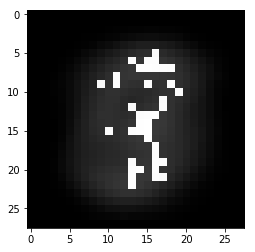

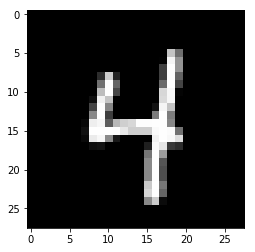

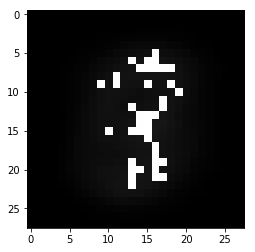

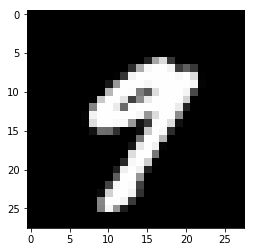

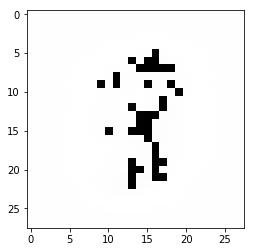

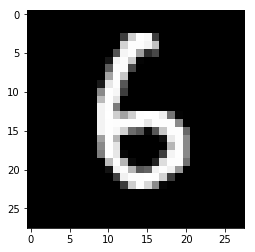

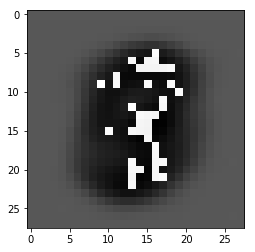

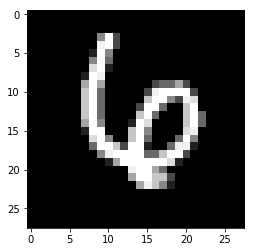

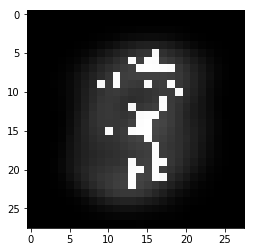

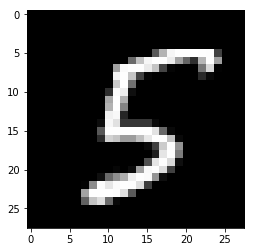

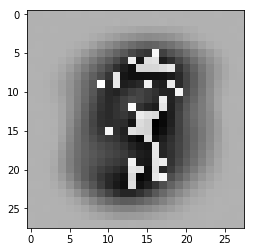

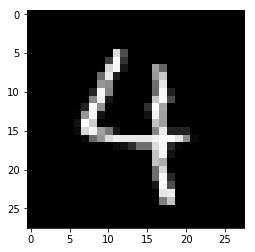

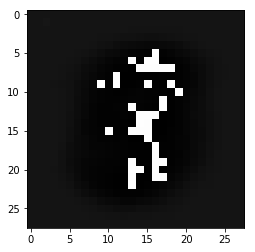

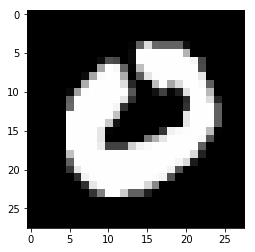

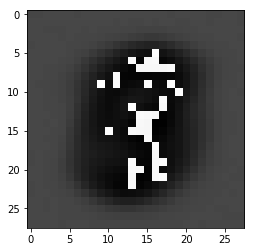

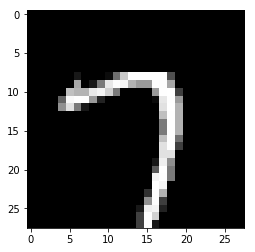

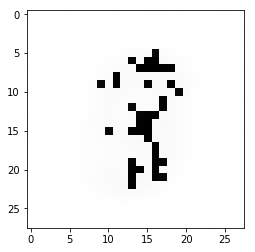

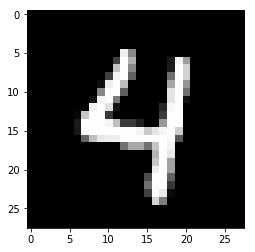

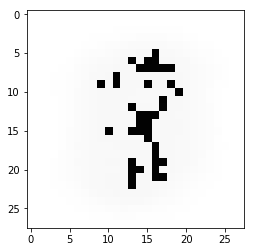

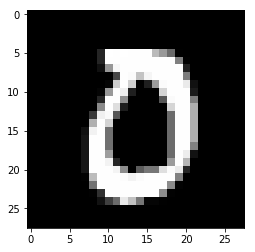

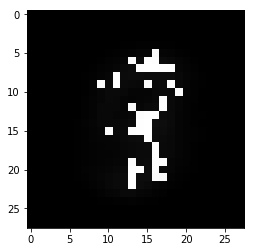

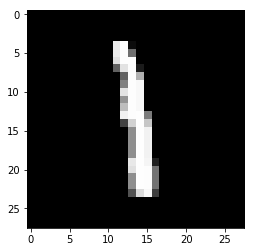

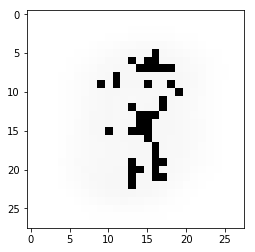

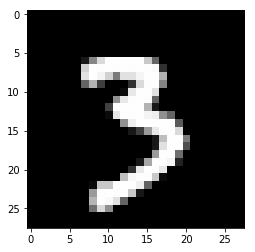

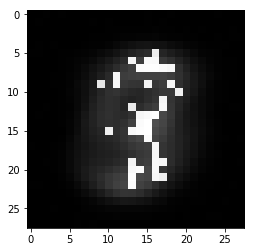

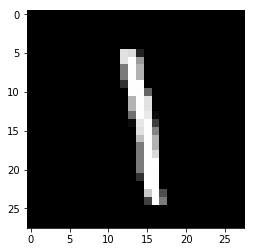

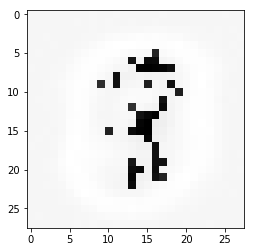

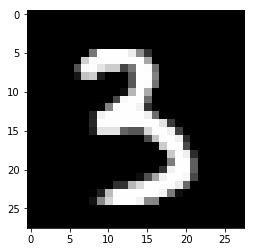

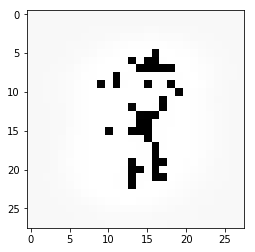

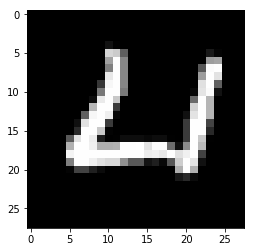

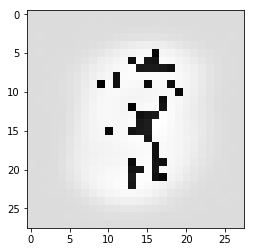

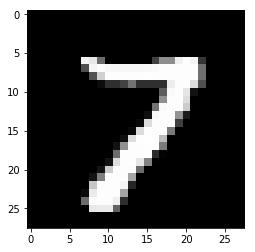

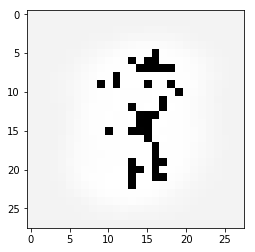

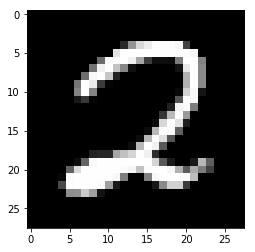

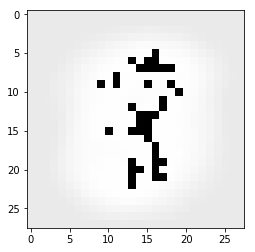

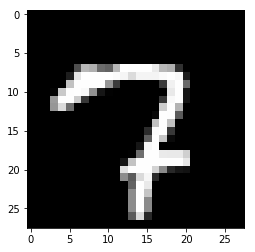

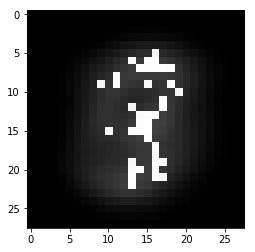

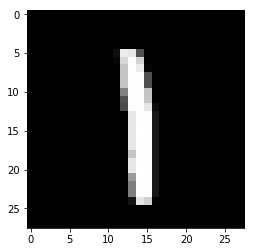

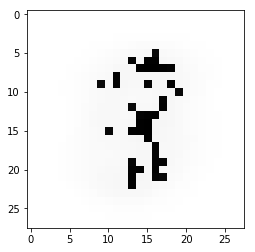

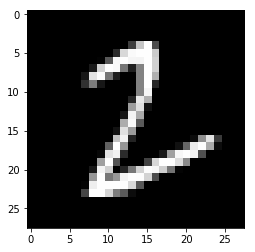

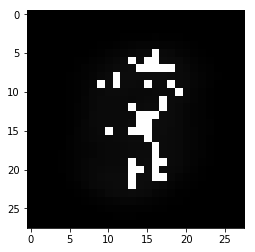

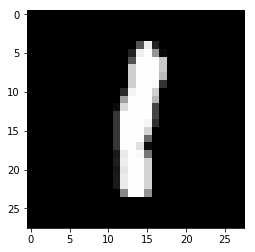

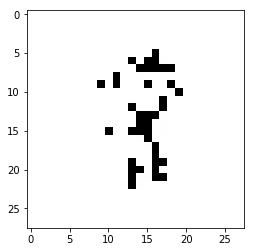

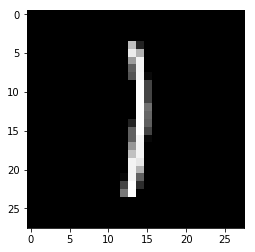

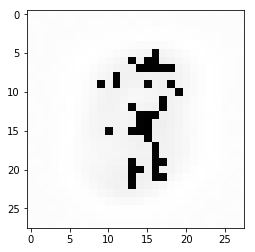

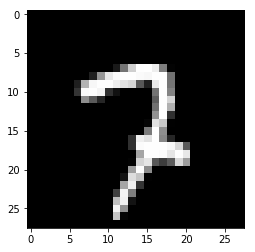

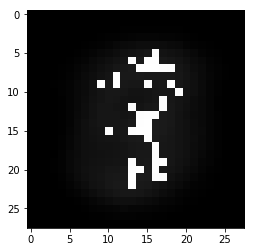

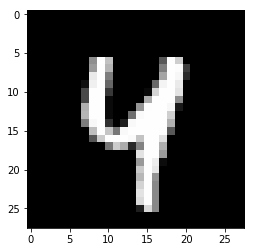

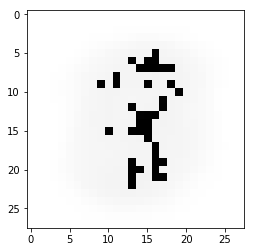

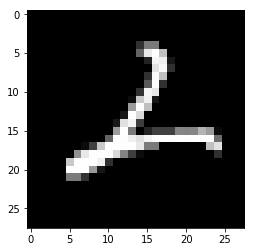

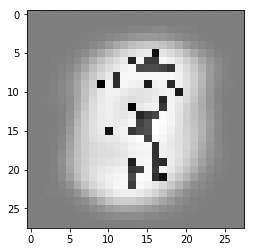

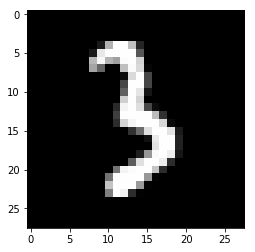

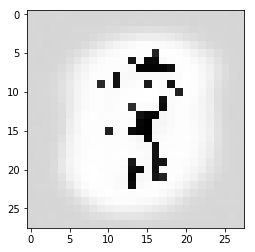

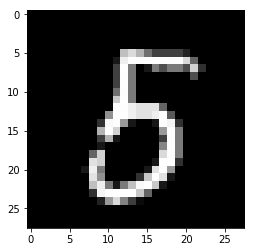

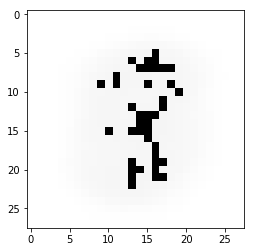

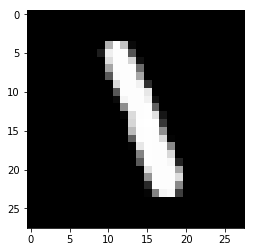

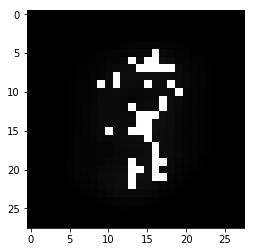

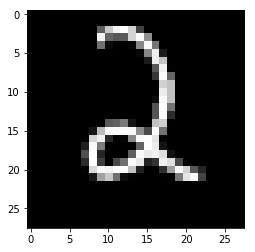

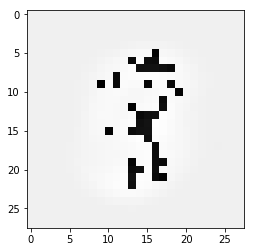

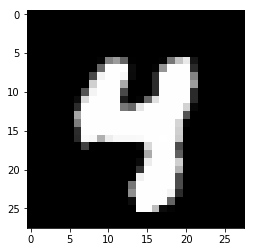

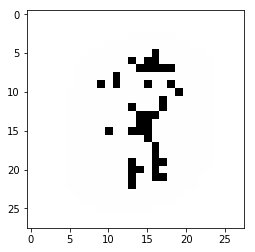

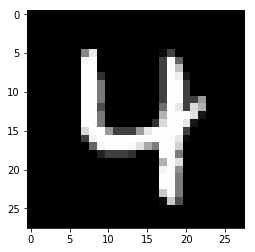

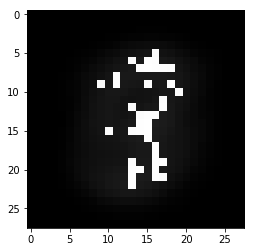

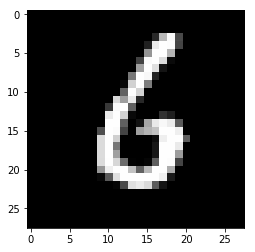

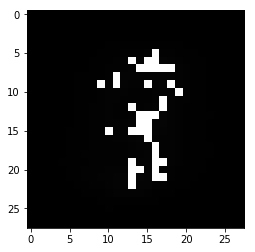

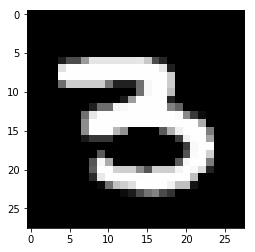

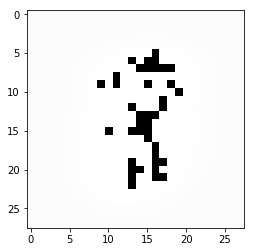

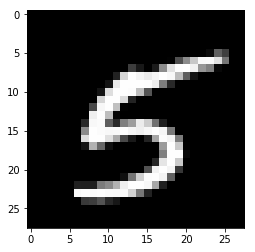

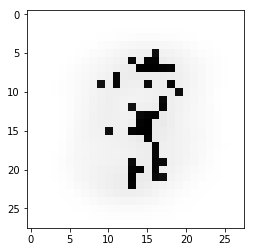

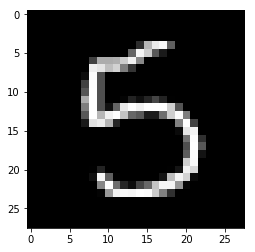

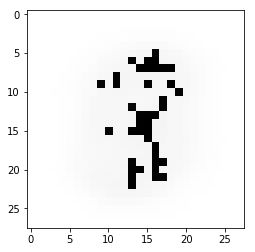

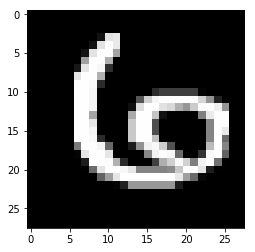

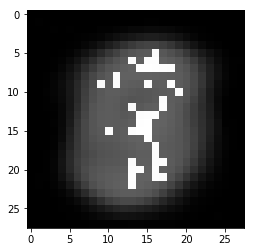

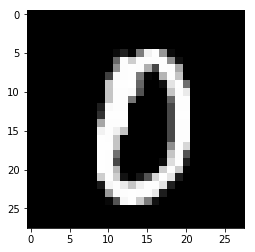

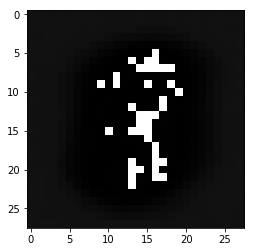

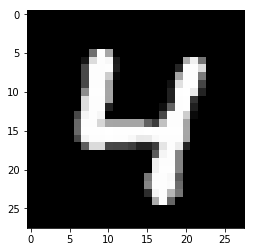

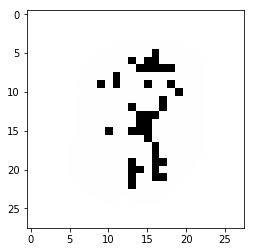

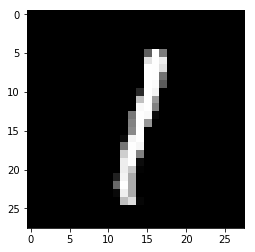

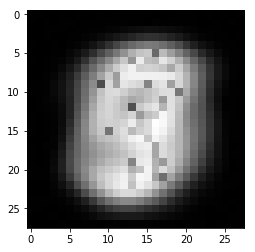

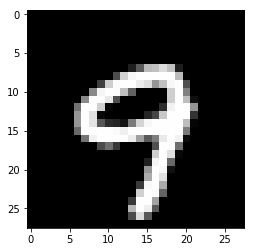

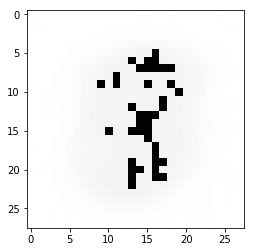

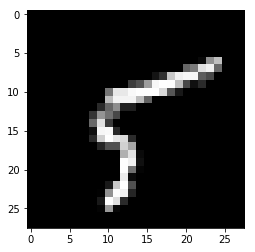

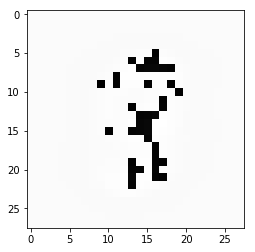

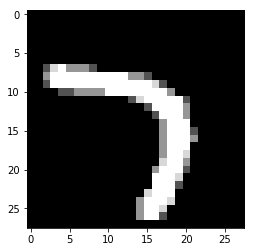

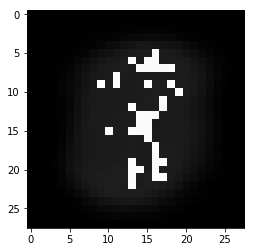

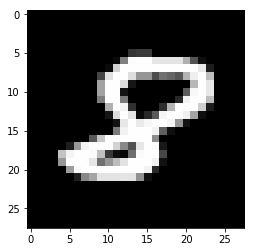

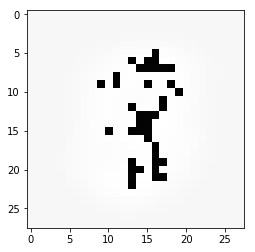

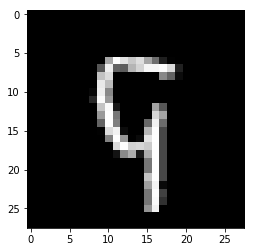

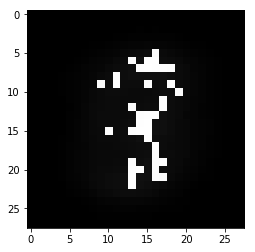

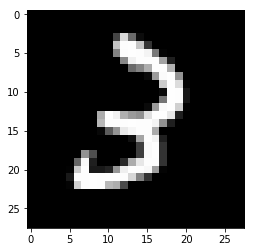

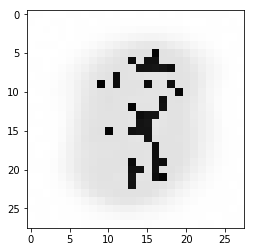

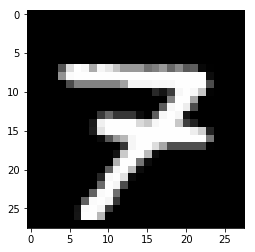

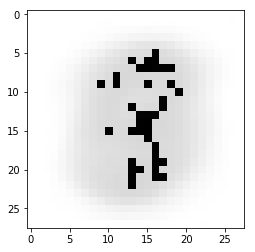

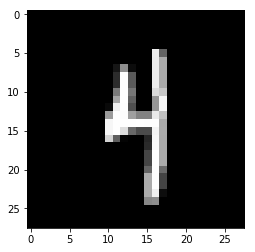

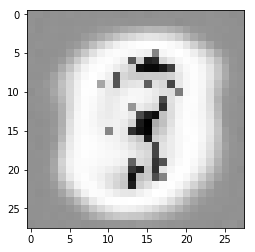

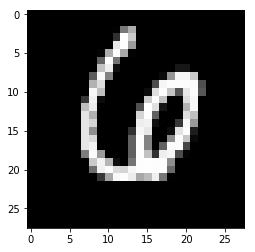

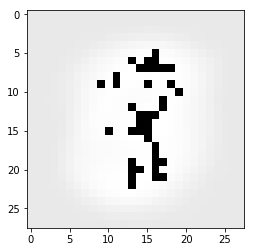

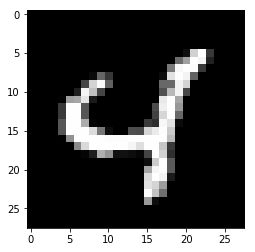

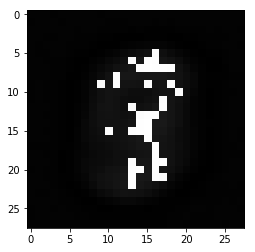

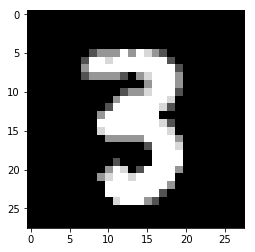

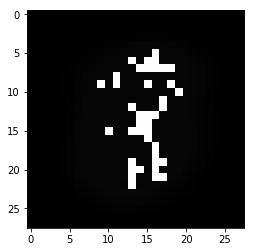

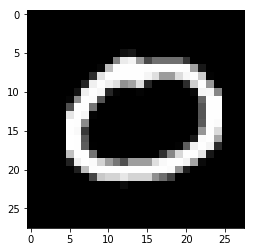

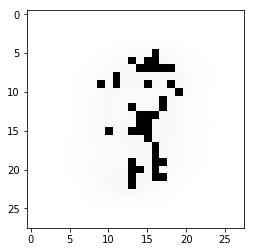

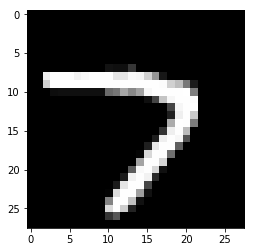

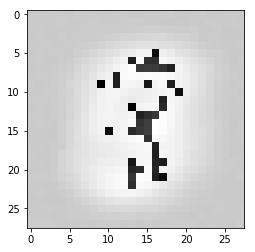

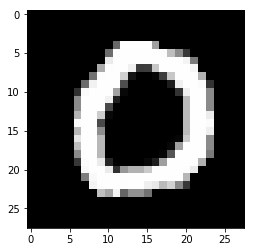

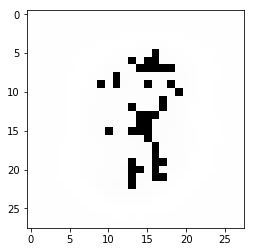

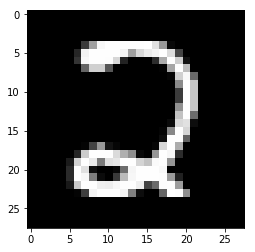

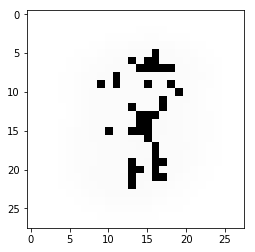

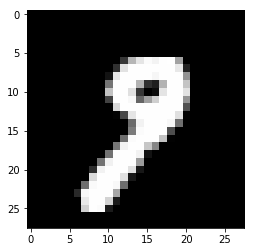

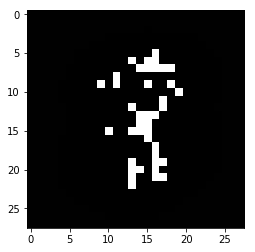

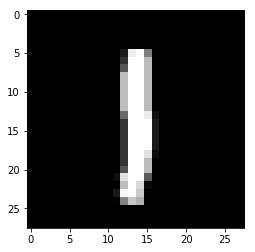

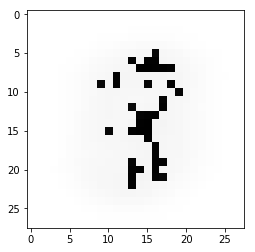

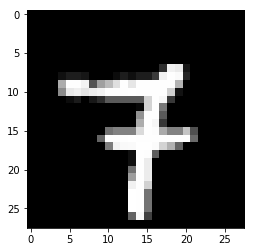

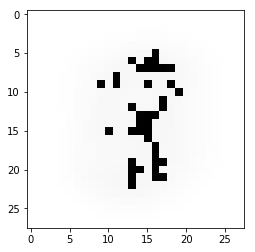

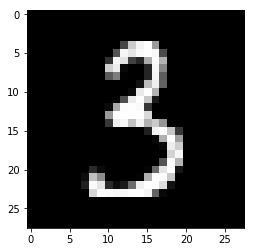

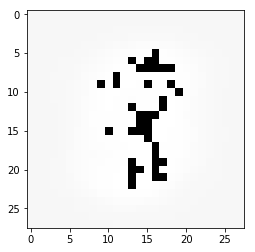

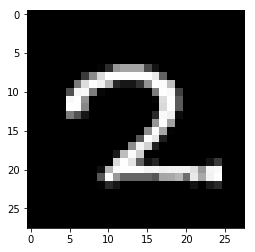

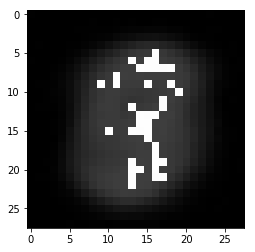

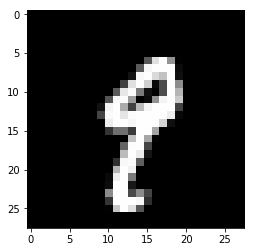

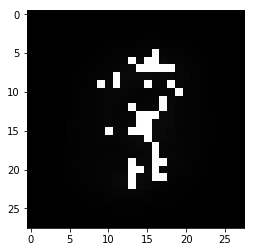

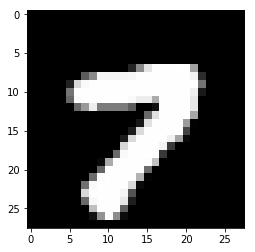

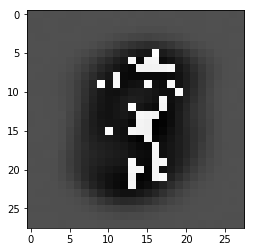

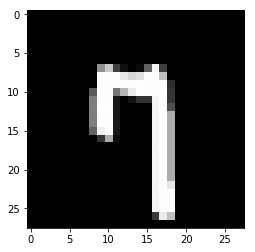

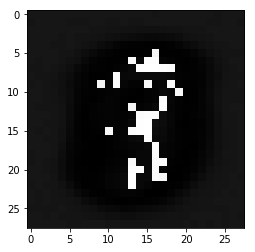

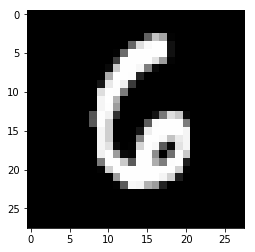

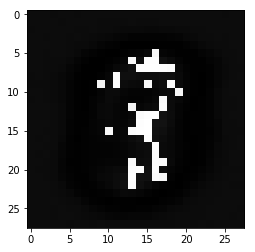

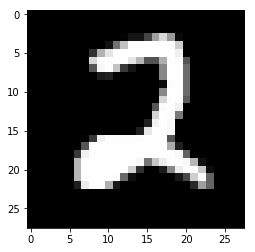

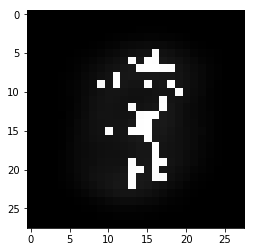

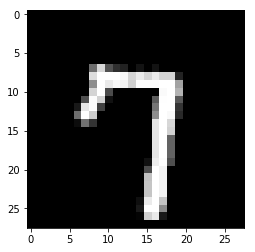

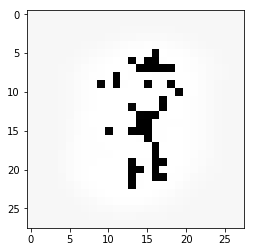

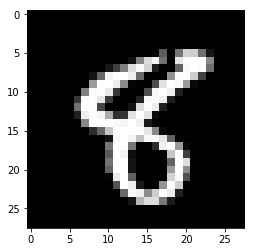

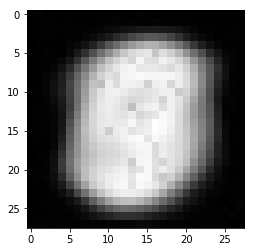

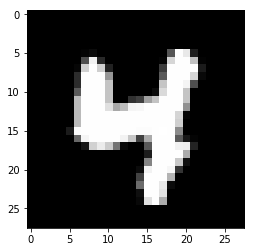

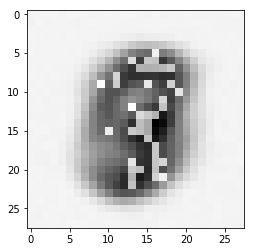

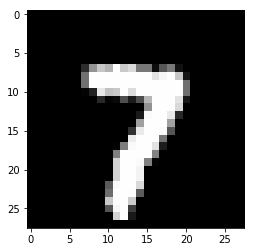

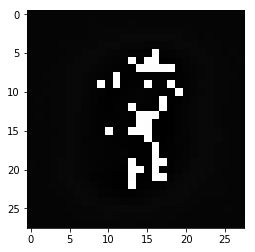

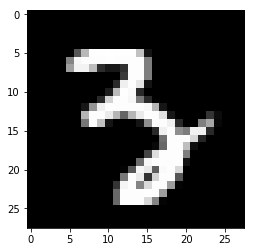

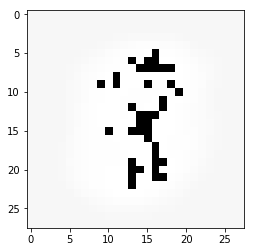

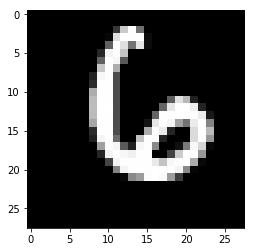

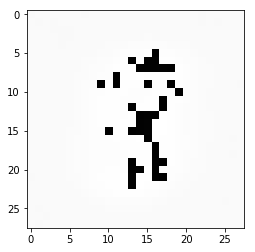

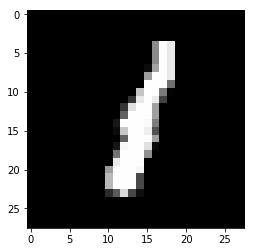

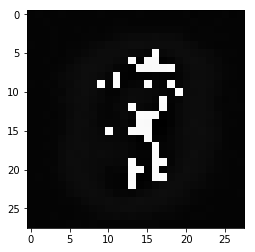

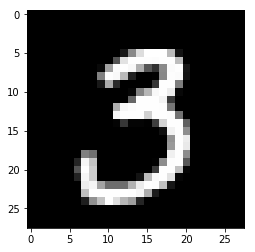

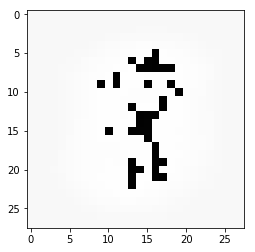

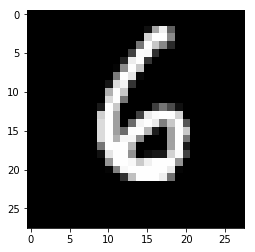

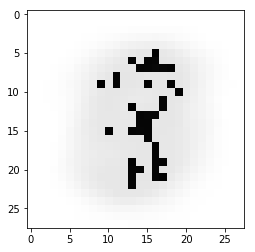

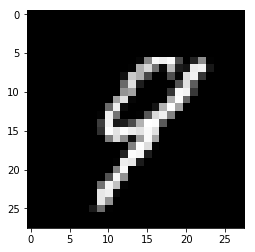

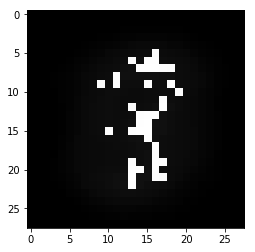

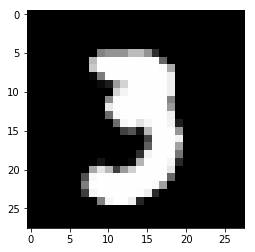

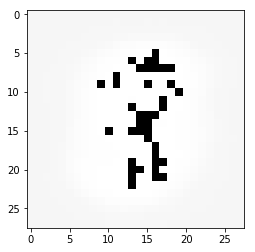

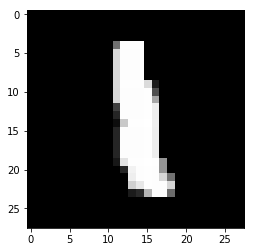

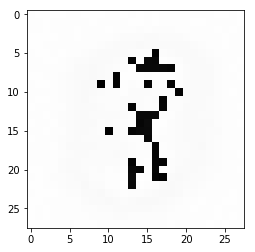

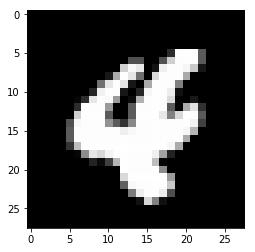

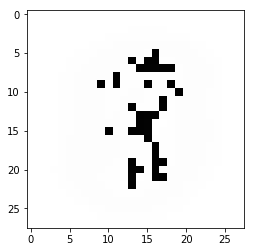

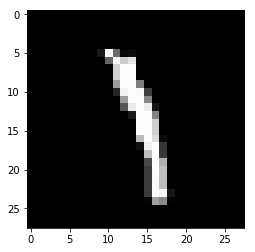

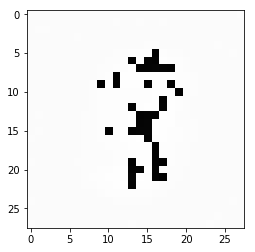

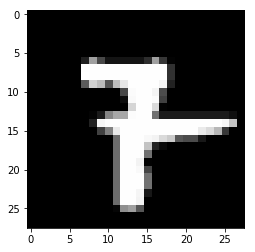

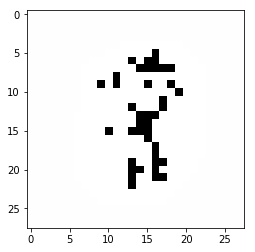

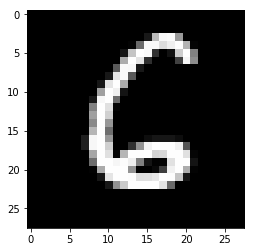

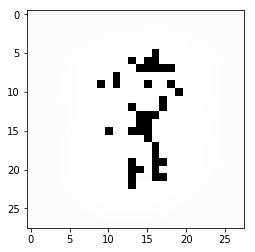

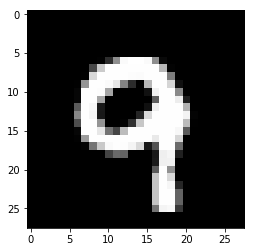

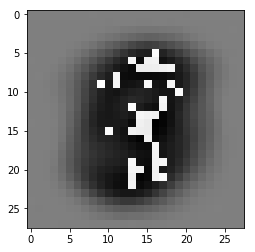

In [5]:
for i in range(batch_size):
    plt.imshow(mnist.test.images[i].reshape(28,28),cmap='Greys_r')
    plt.show()
    plt.imshow(predict[i].reshape(28,28),cmap = 'Greys_r')
    plt.show()